<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/13_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 501kB 51.8MB/s 
     |████████████████████████████████| 3.1MB 54.5MB/s 


In [0]:
%%capture
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Flatten, Input, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
D = 1
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  return 0

def generate_data(T, is_short = True):
  X = []
  Y = []
  for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    if is_short:
      y = get_label(x, -1, -2, -3) # short distance
    else:
      y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

  X = np.array(X)
  y = np.array(Y)
  return X, Y

## Linear model

In [19]:
T = 10
X, Y = generate_data(T)

i = Input(shape = (T,))
x = Dense(1, activation = "sigmoid")(i)

model = Model(i, x)
model.compile(loss= "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])
r = model.fit(X, Y, validation_split=0.2, epochs = 40)

Train on 4000 samples, validate on 1000 samples
Epoch 1/40
4000/4000 [==============================] - 0s 71us/sample - loss: 0.6748 - accuracy: 0.5953 - val_loss: 0.5928 - val_accuracy: 0.6250
Epoch 2/40
4000/4000 [==============================] - 0s 41us/sample - loss: 0.5932 - accuracy: 0.6258 - val_loss: 0.5872 - val_accuracy: 0.6290
Epoch 3/40
4000/4000 [==============================] - 0s 37us/sample - loss: 0.5919 - accuracy: 0.6263 - val_loss: 0.5871 - val_accuracy: 0.6340
Epoch 4/40
4000/4000 [==============================] - 0s 38us/sample - loss: 0.5920 - accuracy: 0.6320 - val_loss: 0.5870 - val_accuracy: 0.6310
Epoch 5/40
4000/4000 [==============================] - 0s 37us/sample - loss: 0.5920 - accuracy: 0.6283 - val_loss: 0.5871 - val_accuracy: 0.6330
Epoch 6/40
4000/4000 [==============================] - 0s 37us/sample - loss: 0.5919 - accuracy: 0.6263 - val_loss: 0.5860 - val_accuracy: 0.6370
Epoch 7/40
4000/4000 [==============================] - 0s 39us/sample

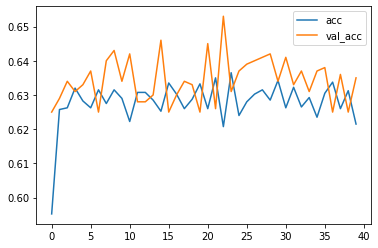

In [20]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

## SimpleRNN Short distance

In [21]:
T = 10
X, Y = generate_data(T)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 30)

Train on 2500 samples, validate on 2500 samples
Epoch 1/30
2500/2500 [==============================] - 1s 323us/sample - loss: 0.5897 - accuracy: 0.6496 - val_loss: 0.5311 - val_accuracy: 0.7140
Epoch 2/30
2500/2500 [==============================] - 0s 120us/sample - loss: 0.4986 - accuracy: 0.7392 - val_loss: 0.4599 - val_accuracy: 0.7520
Epoch 3/30
2500/2500 [==============================] - 0s 120us/sample - loss: 0.4318 - accuracy: 0.7980 - val_loss: 0.4023 - val_accuracy: 0.8372
Epoch 4/30
2500/2500 [==============================] - 0s 117us/sample - loss: 0.3792 - accuracy: 0.8460 - val_loss: 0.3576 - val_accuracy: 0.8724
Epoch 5/30
2500/2500 [==============================] - 0s 124us/sample - loss: 0.3346 - accuracy: 0.8768 - val_loss: 0.3117 - val_accuracy: 0.8988
Epoch 6/30
2500/2500 [==============================] - 0s 120us/sample - loss: 0.2972 - accuracy: 0.9012 - val_loss: 0.2808 - val_accuracy: 0.9080
Epoch 7/30
2500/2500 [==============================] - 0s 118us

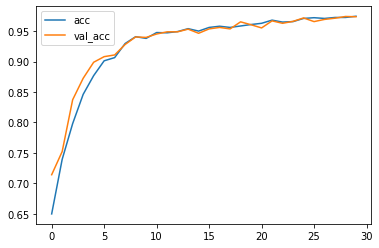

In [22]:
# easily learning the pattern
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

##SimpleRNN Long distance

In [24]:
T = 10
X, Y = generate_data(T, False)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 50)

Train on 2500 samples, validate on 2500 samples
Epoch 1/50
2500/2500 [==============================] - 1s 352us/sample - loss: 0.6357 - accuracy: 0.6220 - val_loss: 0.5604 - val_accuracy: 0.6832
Epoch 2/50
2500/2500 [==============================] - 0s 128us/sample - loss: 0.5472 - accuracy: 0.7036 - val_loss: 0.5180 - val_accuracy: 0.7264
Epoch 3/50
2500/2500 [==============================] - 0s 130us/sample - loss: 0.5104 - accuracy: 0.7276 - val_loss: 0.4988 - val_accuracy: 0.7168
Epoch 4/50
2500/2500 [==============================] - 0s 122us/sample - loss: 0.5027 - accuracy: 0.7224 - val_loss: 0.5619 - val_accuracy: 0.6524
Epoch 5/50
2500/2500 [==============================] - 0s 123us/sample - loss: 0.4788 - accuracy: 0.7500 - val_loss: 0.4448 - val_accuracy: 0.7768
Epoch 6/50
2500/2500 [==============================] - 0s 135us/sample - loss: 0.4690 - accuracy: 0.7572 - val_loss: 0.4791 - val_accuracy: 0.7512
Epoch 7/50
2500/2500 [==============================] - 0s 134us

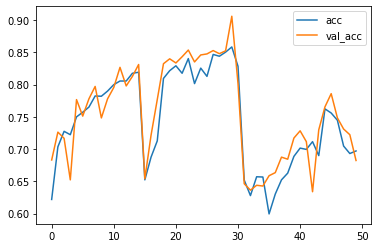

In [25]:
# having hard time learning the pattern
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

##LSTM Long distance with 20 sequence

In [29]:
T = 20
X, Y = generate_data(T, False)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 150)

Train on 2500 samples, validate on 2500 samples
Epoch 1/150
2500/2500 [==============================] - 2s 750us/sample - loss: 0.6714 - accuracy: 0.6096 - val_loss: 0.6573 - val_accuracy: 0.6368
Epoch 2/150
2500/2500 [==============================] - 1s 306us/sample - loss: 0.6659 - accuracy: 0.6184 - val_loss: 0.6567 - val_accuracy: 0.6368
Epoch 3/150
2500/2500 [==============================] - 1s 306us/sample - loss: 0.6651 - accuracy: 0.6184 - val_loss: 0.6612 - val_accuracy: 0.6368
Epoch 4/150
2500/2500 [==============================] - 1s 302us/sample - loss: 0.6654 - accuracy: 0.6184 - val_loss: 0.6589 - val_accuracy: 0.6368
Epoch 5/150
2500/2500 [==============================] - 1s 305us/sample - loss: 0.6650 - accuracy: 0.6184 - val_loss: 0.6553 - val_accuracy: 0.6368
Epoch 6/150
2500/2500 [==============================] - 1s 308us/sample - loss: 0.6654 - accuracy: 0.6184 - val_loss: 0.6552 - val_accuracy: 0.6368
Epoch 7/150
2500/2500 [==============================] - 1

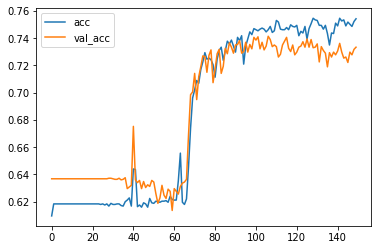

In [30]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()